### Домашнее задание №1. Обработка изображений и компьютерное зрение  
Постановка задачи:  
Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. 

In [96]:
# Импорт необходимых библиотек
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio
import scipy.signal

In [2]:
# Загрузка изображения
img = imageio.imread('cape_point.jpg')

<ipython-input-2-90658bedaa04>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('cape_point.jpg')


In [4]:
img[:5, :5, :]

Array([[[ 58, 125, 203],
        [ 58, 125, 203],
        [ 58, 125, 203],
        [ 58, 125, 203],
        [ 58, 125, 203]],

       [[ 58, 125, 203],
        [ 58, 125, 203],
        [ 58, 125, 203],
        [ 58, 125, 203],
        [ 58, 125, 203]],

       [[ 57, 126, 203],
        [ 57, 126, 203],
        [ 57, 126, 203],
        [ 57, 126, 203],
        [ 57, 126, 203]],

       [[ 57, 126, 203],
        [ 57, 126, 203],
        [ 57, 126, 203],
        [ 57, 126, 203],
        [ 57, 126, 203]],

       [[ 54, 125, 203],
        [ 54, 125, 203],
        [ 54, 125, 203],
        [ 54, 125, 203],
        [ 54, 125, 203]]], dtype=uint8)

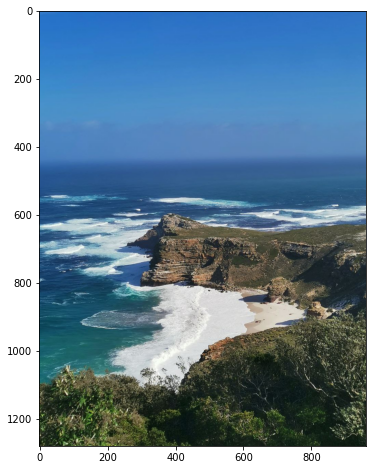

In [8]:
# Выведем изображение
plt.figure(figsize = (8,8))
plt.imshow(img)
plt.show()

### Цветовая обработка изображения

Преобразование в формат float32 и нормировка

In [17]:
img = img.astype(np.float32) / 255

1. Линейное увеличение яркости

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


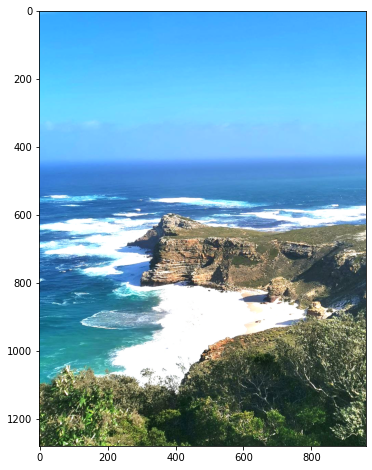

In [37]:
plt.figure(figsize=(8, 8))
plt.imshow(img/0.5) # приводит к увеличению значения пикселя - увеличению яркости
plt.imshow(img*1.5)

2. Линейное уменьшение яркости

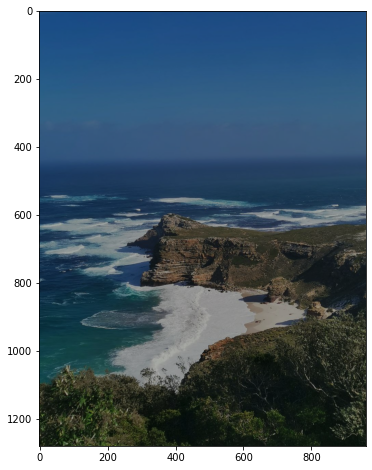

In [31]:
plt.figure(figsize=(8, 8))
plt.imshow(img/1.5) # приводит к уменьшению значения пикселя - уменьшению яркости

4. Нелинейное увеличение яркости

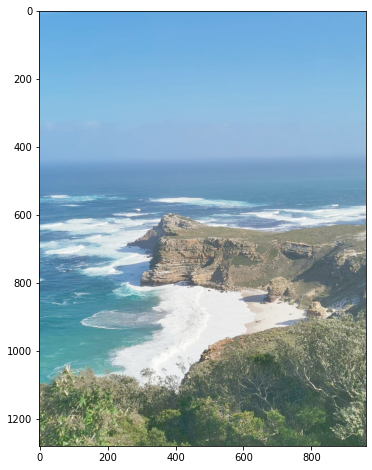

In [32]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5) 

5. Нелинейное уменьшение яркости

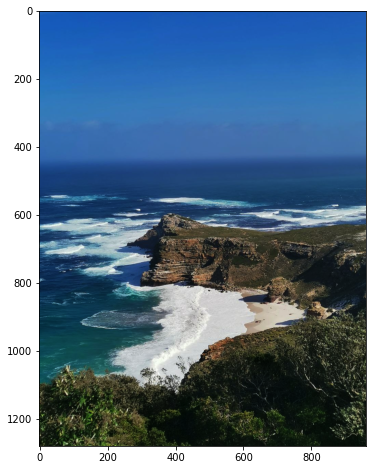

In [46]:
plt.figure(figsize=(8, 8))
plt.imshow(img**1.3) 

Нелинейные изменения лучше преобразуют изображения, нежели линейные 

6. Переход к изображению в градациях серого

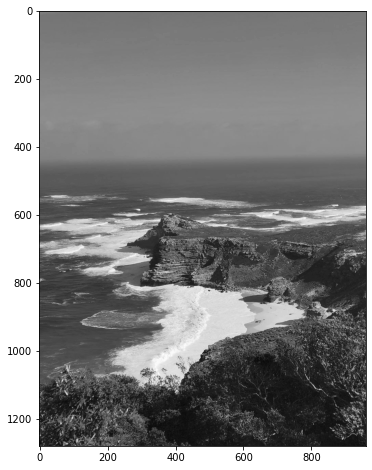

In [47]:
plt.figure(figsize=(8, 8))
plt.imshow(np.mean(img, axis=2), cmap='gray') #выполнили усреднение по каналам RGB

### Переход в пространство HSV 

In [50]:
from skimage.color import rgb2hsv, hsv2rgb

In [71]:
# Переводим изображение в цветовое пространство HSV
img_hsv = rgb2hsv(img)
img_hsv[:5, :5, :]

array([[[0.58965516, 0.71428573, 0.79607844],
        [0.58965516, 0.71428573, 0.79607844],
        [0.58965516, 0.71428573, 0.79607844],
        [0.58965516, 0.71428573, 0.79607844],
        [0.58965516, 0.71428573, 0.79607844]],

       [[0.58965516, 0.71428573, 0.79607844],
        [0.58965516, 0.71428573, 0.79607844],
        [0.58965516, 0.71428573, 0.79607844],
        [0.58965516, 0.71428573, 0.79607844],
        [0.58965516, 0.71428573, 0.79607844]],

       [[0.58789957, 0.7192118 , 0.79607844],
        [0.58789957, 0.7192118 , 0.79607844],
        [0.58789957, 0.7192118 , 0.79607844],
        [0.58789957, 0.7192118 , 0.79607844],
        [0.58789957, 0.7192118 , 0.79607844]],

       [[0.58789957, 0.7192118 , 0.79607844],
        [0.58789957, 0.7192118 , 0.79607844],
        [0.58789957, 0.7192118 , 0.79607844],
        [0.58789957, 0.7192118 , 0.79607844],
        [0.58789957, 0.7192118 , 0.79607844]],

       [[0.5872483 , 0.7339902 , 0.79607844],
        [0.5872483 , 0.733

Корректировка тона (Hue) - 1я размерность

In [72]:
# Делаем копию
img_hsv_new = np.copy(img_hsv)

# Корректируем hue
img_hsv_new[:, :, 0] *=2

# переводим обратно в RGB
img_new = hsv2rgb(img_hsv_new)

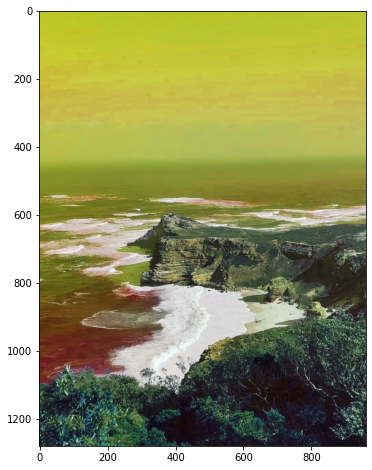

In [73]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new) 

Уменьшение Saturation (насыщенность) -2я размерность

In [80]:
# Делаем копию
img_hsv_new = np.copy(img_hsv)

# Понижаем насыщенность
img_hsv_new[:, :, 1] *=0.3

# переводим обратно в RGB
img_new = hsv2rgb(img_hsv_new)

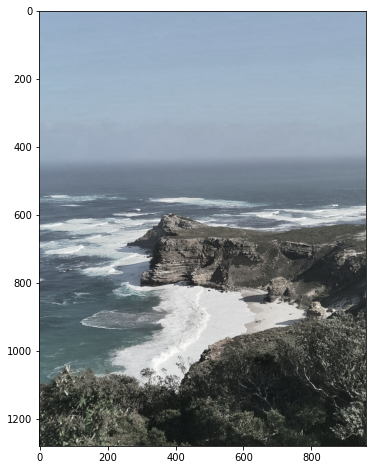

In [81]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new) 

Повышение Value (яркость/интенсивность) -3я размерность

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


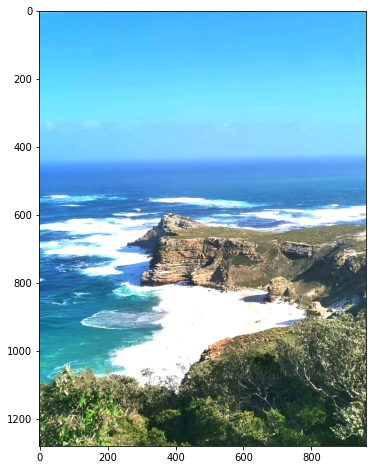

In [83]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 2] *=1.6
img_new = hsv2rgb(img_hsv_new)

plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Свертка изображения

In [146]:
# Придумаем ядро свертки для эксперимента
win_size = (11, 11)

np.random.seed(1)
# создадим рандомный массив чисел float от 0 до 1 размерности 11х11.
w = (np.random.random(win_size[0]**2)).reshape(11,11)
# разделим каждое значение на среднее
w /= np.mean(w)

In [147]:
w

array([[8.38994621e-01, 1.44920021e+00, 2.30107417e-04, 6.08254239e-01,
        2.95253971e-01, 1.85773373e-01, 3.74731582e-01, 6.95223724e-01,
        7.98245112e-01, 1.08402995e+00, 8.43365431e-01],
       [1.37857348e+00, 4.11331622e-01, 1.76665931e+00, 5.51003139e-02,
        1.34889437e+00, 8.39563574e-01, 1.12401206e+00, 2.82440459e-01,
        3.98554709e-01, 1.61099505e+00, 1.94801772e+00],
       [6.30569122e-01, 1.39286403e+00, 1.76318222e+00, 1.79983351e+00,
        1.71098012e-01, 7.85731992e-02, 3.41676954e-01, 1.76670974e+00,
        1.97861177e-01, 8.47214363e-01, 1.92715050e+00],
       [1.07265996e+00, 1.39196774e+00, 6.34776857e-01, 1.38115154e+00,
        1.67915947e+00, 3.67936611e-02, 1.50919385e+00, 1.98946129e+00,
        1.50521304e+00, 5.64217231e-01, 1.58792846e+00],
       [2.07677445e-01, 9.01104150e-01, 1.82797726e+00, 5.90713891e-01,
        5.78966957e-01, 2.61600758e-01, 3.89638276e-02, 1.36572976e+00,
        4.25768542e-01, 5.34245714e-01, 9.88981953e-

In [148]:
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2).astype('int8')

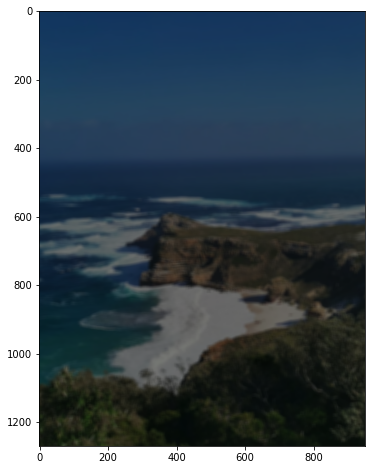

In [149]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

Применив экспериментальную сверку получился эффект затемнения за счет того, что цифры в ядре были от 0 до 1, и эффект размытия за счет деления на среднее.